In [1]:
import os

# change working directory, run this cell once
os.chdir("../../")

In this notebook, we will demonstrate an example on how to use the ``AutoCluster`` class for clustering.

### Import packages

In [2]:
# we will be using sample datasets in sklearn
from sklearn import datasets
from collections import Counter
import pandas as pd

# autocluster functionalities
import autocluster
from autocluster import AutoCluster, get_evaluator

%load_ext autoreload
%autoreload 2

### Load sklearn dummy dataset

In [3]:
X, y = datasets.make_blobs(n_samples=1000, 
                           n_features=2, 
                           centers=6, 
                           cluster_std=0.5, 
                           shuffle=True, random_state=27)
dummy_df = pd.DataFrame(X)
dummy_df.head(5)

,0,1
0,7.742343,-6.603815
1,8.726121,6.433689
2,-1.427522,5.393546
3,8.801468,-5.185687
4,-1.404321,9.526536


- Note that we are converting the dataset from ``numpy`` format to ``pandas DataFrame`` format. 
- This is because the ``AutoCluster.fit()`` function only accepts ``DataFrame`` format as input.
- There are 2 columns in this dataset, named ``0`` and ``1``. 

In [4]:
print("Shape of this dataframe is {}".format(dummy_df.shape))

Shape of this dataframe is (1000, 2)


### Finding an optimal clustering model using Bayesian Optimization (SMAC)

In [5]:
cluster = AutoCluster(logger=None)
fit_params = {
    "df": dummy_df, 
    "cluster_alg_ls": [
        'KMeans', 'GaussianMixture', 'MiniBatchKMeans'
    ], 
    "dim_reduction_alg_ls": [
        'NullModel'
    ],
    "optimizer": 'smac',
    "n_evaluations": 40,
    "run_obj": 'quality',
    "seed": 27,
    "cutoff_time": 10,
    "preprocess_dict": {
        "numeric_cols": list(range(2)),
        "categorical_cols": [],
        "ordinal_cols": [],
        "y_col": []
    },
    "evaluator": get_evaluator(evaluator_ls = ['silhouetteScore', 
                                               'daviesBouldinScore', 
                                               'calinskiHarabaszScore'], 
                               weights = [1, 1, 1], 
                               clustering_num = None, 
                               min_proportion = .01, 
                               min_relative_proportion='default'),
    "n_folds": 3,
    "warmstart": False,
    "verbose_level": 1,
}
result_dict = cluster.fit(**fit_params)

660/1000 datapoints remaining after outlier removal
Truncated n_evaluations: 40
Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___KMeans': 5, 'clustering_choice': 'KMeans', 'random_state___NullModel': 1}
Score obtained by this configuration: 0.13574354072697425
Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___MiniBatchKMeans': 13, 'batch_size___MiniBatchKMeans': 958, 'clustering_choice': 'MiniBatchKMeans', 'random_state___NullModel': 2}
Score obtained by this configuration: 0.3130952857220725
Fitting configuration: 
{'init_params___GaussianMixture': 'kmeans', 'dim_reduction_choice': 'NullModel', 'covariance_type___GaussianMixture': 'spherical', 'n_components___GaussianMixture': 60, 'clustering_choice': 'GaussianMixture'}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___MiniBatchKMeans': 2, 'batch_size___MiniBatchKMeans': 969, 'clustering_choice': 'MiniBatchKMeans', 'random_state___NullModel': 1}
Score obtained by this configuration: 0.22031549539601344
Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___KMeans': 7, 'clustering_choice': 'KMeans', 'random_state___NullModel': 2}
Score obtained by this configuration: 0.19040337173344157
Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___MiniBatchKMeans': 19, 'batch_size___MiniBatchKMeans': 250, 'clustering_choice': 'MiniBatchKMeans', 'random_state___NullModel': 1}
Score obtained by this configuration: 0.3246427534032912
Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___KMeans': 25, 'clustering_choice': 'KMeans', 'random_state___NullModel': 1}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___MiniBatchKMeans': 46, 'batch_size___MiniBatchKMeans': 744, 'clustering_choice': 'MiniBatchKMeans', 'random_state___NullModel': 2}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___KMeans': 24, 'clustering_choice': 'KMeans', 'random_state___NullModel': 1}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___KMeans': 73, 'clustering_choice': 'KMeans'}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___KMeans': 46, 'clustering_choice': 'KMeans', 'random_state___NullModel': 2}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___MiniBatchKMeans': 76, 'batch_size___MiniBatchKMeans': 16, 'clustering_choice': 'MiniBatchKMeans', 'random_state___NullModel': 1}


/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=48 should be larger than k=76. Setting it to 3*k
  init_size=init_size)
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=48 should be larger than k=76. Setting it to 3*k
  init_size=init_size)
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=48 should be larger than k=76. Setting it to 3*k
  init_size=init_size)
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=48 should be larger than k=76. Setting it to 3*k
  init_size=init_size)
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=48 should be larger than k=76. Setting it to 3*k
  init_size=init_size)
/home

Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___MiniBatchKMeans': 41, 'batch_size___MiniBatchKMeans': 118, 'clustering_choice': 'MiniBatchKMeans', 'random_state___NullModel': 1}
Score obtained by this configuration: inf


Fitting configuration: 
{'init_params___GaussianMixture': 'kmeans', 'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'tied', 'dim_reduction_choice': 'NullModel', 'n_components___GaussianMixture': 24, 'random_state___NullModel': 2}
Score obtained by this configuration: inf


Fitting configuration: 
{'init_params___GaussianMixture': 'kmeans', 'dim_reduction_choice': 'NullModel', 'covariance_type___GaussianMixture': 'tied', 'n_components___GaussianMixture': 30, 'clustering_choice': 'GaussianMixture'}
Score obtained by this configuration: inf


Fitting configuration: 
{'warm_start___GaussianMixture': True, 'covariance_type___GaussianMixture': 'spherical', 'n_components___GaussianMixture': 67, 'init_params___GaussianMixture': 'random', 'dim_reduction_choice': 'NullModel', 'clustering_choice': 'GaussianMixture', 'random_state___NullModel': 2}


/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___MiniBatchKMeans': 3, 'batch_size___MiniBatchKMeans': 669, 'clustering_choice': 'MiniBatchKMeans', 'random_state___NullModel': 2}
Score obtained by this configuration: 0.1641883513892987
Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___KMeans': 16, 'clustering_choice': 'KMeans', 'random_state___NullModel': 2}
Score obtained by this configuration: 0.3244092267516297
Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___KMeans': 53, 'clustering_choice': 'KMeans'}
Score obtained by this configuration: inf


Fitting configuration: 
{'init_params___GaussianMixture': 'random', 'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'spherical', 'dim_reduction_choice': 'NullModel', 'n_components___GaussianMixture': 53, 'random_state___NullModel': 1}


/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'init_params___GaussianMixture': 'kmeans', 'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'spherical', 'dim_reduction_choice': 'NullModel', 'n_components___GaussianMixture': 4, 'random_state___NullModel': 1}
Score obtained by this configuration: 0.167065208293769
Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___MiniBatchKMeans': 31, 'batch_size___MiniBatchKMeans': 219, 'clustering_choice': 'MiniBatchKMeans', 'random_state___NullModel': 2}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___MiniBatchKMeans': 55, 'batch_size___MiniBatchKMeans': 168, 'clustering_choice': 'MiniBatchKMeans', 'random_state___NullModel': 1}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'batch_size___MiniBatchKMeans': 711, 'clustering_choice': 'MiniBatchKMeans', 'n_clusters___MiniBatchKMeans': 6}
Score obtained by this configuration: 0.12146433323727658
Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___MiniBatchKMeans': 3, 'batch_size___MiniBatchKMeans': 229, 'clustering_choice': 'MiniBatchKMeans', 'random_state___NullModel': 2}
Score obtained by this configuration: 0.1641883513892987
Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___KMeans': 79, 'clustering_choice': 'KMeans', 'random_state___NullModel': 2}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'batch_size___MiniBatchKMeans': 921, 'clustering_choice': 'MiniBatchKMeans', 'n_clusters___MiniBatchKMeans': 10}
Score obtained by this configuration: 0.3034981031638786
Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___KMeans': 52, 'clustering_choice': 'KMeans', 'random_state___NullModel': 2}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___MiniBatchKMeans': 2, 'batch_size___MiniBatchKMeans': 229, 'clustering_choice': 'MiniBatchKMeans', 'random_state___NullModel': 2}
Score obtained by this configuration: 0.24808170702080704
Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'batch_size___MiniBatchKMeans': 417, 'clustering_choice': 'MiniBatchKMeans', 'n_clusters___MiniBatchKMeans': 57}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___MiniBatchKMeans': 8, 'batch_size___MiniBatchKMeans': 230, 'clustering_choice': 'MiniBatchKMeans', 'random_state___NullModel': 1}
Score obtained by this configuration: 0.2321712592608993
Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'batch_size___MiniBatchKMeans': 227, 'clustering_choice': 'MiniBatchKMeans', 'n_clusters___MiniBatchKMeans': 7}
Score obtained by this configuration: 0.19116604708163162
Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___MiniBatchKMeans': 6, 'batch_size___MiniBatchKMeans': 221, 'clustering_choice': 'MiniBatchKMeans', 'random_state___NullModel': 1}
Score obtained by this configuration: 0.12146433323727658
Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'batch_size___MiniBatchKMeans': 217, 'clustering_choice': 'MiniBatchKMeans', 'n_clusters___MiniBatchKMeans': 1}
Score obtained by this configuration: inf


Fitting configuration: 
{'init_params___GaussianMixture': 'kmeans', 'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'tied', 'dim_reduction_choice': 'NullModel', 'n_components___GaussianMixture': 32, 'random_state___NullModel': 2}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___KMeans': 29, 'clustering_choice': 'KMeans'}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___MiniBatchKMeans': 8, 'batch_size___MiniBatchKMeans': 220, 'clustering_choice': 'MiniBatchKMeans', 'random_state___NullModel': 1}
Score obtained by this configuration: 0.24203420003354426
Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___KMeans': 73, 'clustering_choice': 'KMeans', 'random_state___NullModel': 2}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___KMeans': 61, 'clustering_choice': 'KMeans'}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'NullModel', 'n_clusters___MiniBatchKMeans': 9, 'batch_size___MiniBatchKMeans': 222, 'clustering_choice': 'MiniBatchKMeans', 'random_state___NullModel': 1}
Score obtained by this configuration: 0.26493544730431157
Optimization is complete.
Took 23.68 seconds.
The optimal configuration is 
Configuration:
  batch_size___MiniBatchKMeans, Value: 711
  clustering_choice, Value: 'MiniBatchKMeans'
  dim_reduction_choice, Value: 'NullModel'
  n_clusters___MiniBatchKMeans, Value: 6
  random_state___NullModel, Value: 0



There is a lot going on here, let's talk about some of the parameters used in the example above:
- ``cluster_alg_ls``: This is the list of possible clustering algorithms to include within the search space.
- ``dim_reduction_alg_ls``: This is the list of possible dimension reduction algorithms to include within the search space. Dimension reduction is performed **before** the clustering step. ``NullModel`` means no dimension reduction is done.
- ``optimizer``: There are two options for this, ``"smac"`` or ``"random"``. ``"smac"`` does Bayesian Optimization using the SMAC library, while ``"random"`` just performs random search optimization.
- ``n_evaluations``: number of iterations to run, generally the larger the better.
- ``cutoff_time``: If evaluating a certain configuration takes longer than this value (in seconds), it will be terminated.
- ``preprocess_dict``: This is important, ``AutoCluster.fit()`` uses this dictionary to preprocess the dataset. For instance, categorical columns will be one hot encoded, while ordinal columns will encoded as integers. 
- ``evaluator``: This is important, it tells ``AutoCluster.fit()`` how to evaluate a clustering result. 
    - ``evaluator_ls``: list of metric to include in a linear combination. Choices available are ``["silhouetteScore", "daviesBouldinScore", "calinskiHarabaszScore"]``.
    - ``weights``: how much weights to use for each metric in the linear combination.
    - ``clustering_num``: A tuple is expected. If clustering result has n_clusters outside this specified range, ``float(inf)`` will be returned from evaluator.
    - ``min_proportion``: The proportion of points in each cluster must be at least this value.
    - ``min_relative_proportion``: The ratio of number points in the smallest cluster to the number of points in the largest cluster must be at least this value. By using ``'default'``, ``min_relative_proportion`` will be set to `` 5 * min_proportion``.
- ``warmstart``: Whether or not to use warmstart, examples will be shown below on how to use this.
- ``verbose_level``: Must be either 0, 1 or 2. The higher the number, the more logs/print statements are used. For normal usage we recommend using 1.

If you have a logger, you can pass it into the ``AutoCluster()`` constructor.

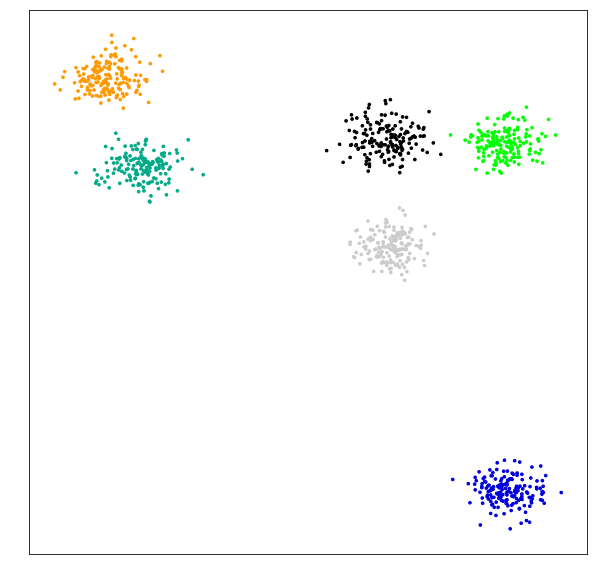

In [6]:
predictions = cluster.predict(dummy_df, save_plot=False)

In [7]:
print(result_dict["optimal_cfg"])
print(Counter(predictions))

Configuration:
  batch_size___MiniBatchKMeans, Value: 711
  clustering_choice, Value: 'MiniBatchKMeans'
  dim_reduction_choice, Value: 'NullModel'
  n_clusters___MiniBatchKMeans, Value: 6
  random_state___NullModel, Value: 0

Counter({0: 168, 1: 167, 2: 167, 4: 167, 5: 166, 3: 165})
